## Sentiment Analysis

Introduction:

So far, all of the analysis we've done has been pretty generic - looking at counts, creating scatter plots, etc. These techniques could be applied to numeric data as well.

When it comes to text data, there are a few popular techniques that we'll be going through in the next few notebooks, starting with sentiment analysis. A few key points to remember with sentiment analysis.

TextBlob Module: Linguistic researchers have labeled the sentiment of words based on their domain expertise. Sentiment of words can vary based on where it is in a sentence. The TextBlob module allows us to take advantage of these labels.

Sentiment Labels: Each word in a corpus is labeled in terms of polarity and subjectivity (there are more labels as well, but we're going to ignore them for now). A corpus' sentiment is the average of these:

Polarity: How positive or negative a word is. -1 is very negative. +1 is very positive.

Subjectivity: How subjective, or opinionated a word is. 0 is fact. +1 is very much an opinion.

### Sentiment of Routine

In [1]:
# We'll start by reading in the corpus, which preserves word order
import pandas as pd

data = pd.read_pickle('corpus.pkl')
data

,transcript,full_name
ali,"Ladies and gentlemen, please welcome to the st...",Ali Wong
anthony,"Thank you. Thank you. Thank you, San Francisco...",Anthony Jeselnik
bill,"[cheers and applause] All right, thank you! Th...",Bill Burr
bo,Bo What? Old MacDonald had a farm E I E I O An...,Bo Burnham
dave,This is Dave. He tells dirty jokes for a livin...,Dave Chappelle
hasan,[theme music: orchestral hip-hop] [crowd roars...,Hasan Minhaj
jim,[Car horn honks] [Audience cheering] [Announce...,Jim Jefferies
joe,[rock music playing] [audience cheering] [anno...,Joe Rogan
john,"Armed with boyish charm and a sharp wit, the f...",John Mulaney
louis,Intro\nFade the music out. Let’s roll. Hold th...,Louis C.K.


In [2]:
pip install textblob

Note: you may need to restart the kernel to use updated packages.


In [3]:
# Create quick lambda functions to find the polarity and subjectivity of each routine

from textblob import TextBlob

pol = lambda x: TextBlob(x).sentiment.polarity
sub = lambda x: TextBlob(x).sentiment.subjectivity

data['polarity'] = data['transcript'].apply(pol)
data['subjectivity'] = data['transcript'].apply(sub)
data

,transcript,full_name,polarity,subjectivity
ali,"Ladies and gentlemen, please welcome to the st...",Ali Wong,0.070450,0.481201
anthony,"Thank you. Thank you. Thank you, San Francisco...",Anthony Jeselnik,0.058761,0.557364
bill,"[cheers and applause] All right, thank you! Th...",Bill Burr,0.016336,0.536688
bo,Bo What? Old MacDonald had a farm E I E I O An...,Bo Burnham,0.075512,0.537691
dave,This is Dave. He tells dirty jokes for a livin...,Dave Chappelle,-0.002607,0.512731
hasan,[theme music: orchestral hip-hop] [crowd roars...,Hasan Minhaj,0.087639,0.459776
jim,[Car horn honks] [Audience cheering] [Announce...,Jim Jefferies,0.045138,0.522287
joe,[rock music playing] [audience cheering] [anno...,Joe Rogan,0.040348,0.546085
john,"Armed with boyish charm and a sharp wit, the f...",John Mulaney,0.082830,0.482040
louis,Intro\nFade the music out. Let’s roll. Hold th...,Louis C.K.,0.057794,0.514377


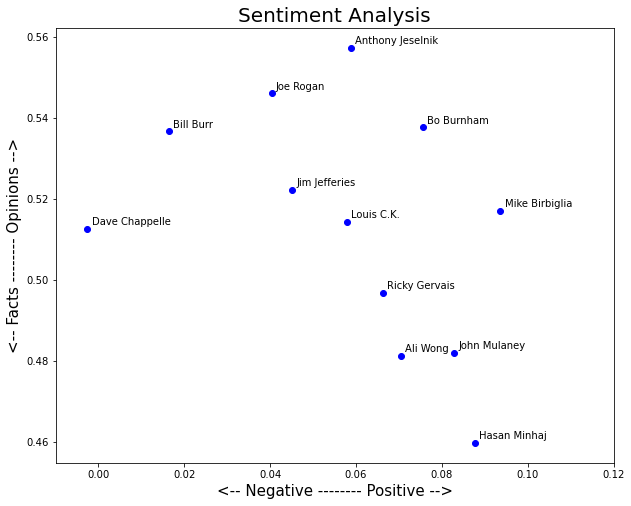

In [4]:
# Let's plot the results
import matplotlib.pyplot as plt

plt.rcParams['figure.figsize'] = [10, 8]

for index, comedian in enumerate(data.index):
    x = data.polarity.loc[comedian]
    y = data.subjectivity.loc[comedian]
    plt.scatter(x, y, color='blue')
    plt.text(x+.001, y+.001, data['full_name'][index], fontsize=10)
    plt.xlim(-.01, .12) 
    
plt.title('Sentiment Analysis', fontsize=20)
plt.xlabel('<-- Negative -------- Positive -->', fontsize=15)
plt.ylabel('<-- Facts -------- Opinions -->', fontsize=15)

plt.show()

### Sentiment of Routine Over Time

Instead of looking at the overall sentiment, let's see if there's anything interesting about the sentiment over time throughout each routine.

In [5]:
# Split each routine into 10 parts
import numpy as np
import math

def split_text(text, n=10):
    '''Takes in a string of text and splits into n equal parts, with a default of 10 equal parts.'''

    # Calculate length of text, the size of each chunk of text and the starting points of each chunk of text
    length = len(text)
    size = math.floor(length / n)
    start = np.arange(0, length, size)
    
    # Pull out equally sized pieces of text and put it into a list
    split_list = []
    for piece in range(n):
        split_list.append(text[start[piece]:start[piece]+size])
    return split_list

In [6]:
# Let's take a look at our data again
data

,transcript,full_name,polarity,subjectivity
ali,"Ladies and gentlemen, please welcome to the st...",Ali Wong,0.070450,0.481201
anthony,"Thank you. Thank you. Thank you, San Francisco...",Anthony Jeselnik,0.058761,0.557364
bill,"[cheers and applause] All right, thank you! Th...",Bill Burr,0.016336,0.536688
bo,Bo What? Old MacDonald had a farm E I E I O An...,Bo Burnham,0.075512,0.537691
dave,This is Dave. He tells dirty jokes for a livin...,Dave Chappelle,-0.002607,0.512731
hasan,[theme music: orchestral hip-hop] [crowd roars...,Hasan Minhaj,0.087639,0.459776
jim,[Car horn honks] [Audience cheering] [Announce...,Jim Jefferies,0.045138,0.522287
joe,[rock music playing] [audience cheering] [anno...,Joe Rogan,0.040348,0.546085
john,"Armed with boyish charm and a sharp wit, the f...",John Mulaney,0.082830,0.482040
louis,Intro\nFade the music out. Let’s roll. Hold th...,Louis C.K.,0.057794,0.514377


In [7]:
# Let's create a list to hold all of the pieces of text
list_pieces = []
for t in data.transcript:
    split = split_text(t)
    list_pieces.append(split)
    
list_pieces

[['Ladies and gentlemen, please welcome to the stage: Ali Wong! Hi. Hello! Welcome! Thank you! Thank you for coming. Hello! Hello. We are gonna have to get this shit over with, ’cause I have to pee in, like, ten minutes. But thank you, everybody, so much for coming. Um… It’s a very exciting day for me. It’s been a very exciting year for me. I turned 33 this year. Yes! Thank you, five people. I appreciate that. Uh, I can tell that I’m getting older, because, now, when I see an 18-year-old girl, my automatic thought… is “Fuck you.” “Fuck you. I don’t even know you, but fuck you!” ‘Cause I’m straight up jealous. I’m jealous, first and foremost, of their metabolism. Because 18-year-old girls, they could just eat like shit, and then they take a shit and have a six-pack, right? They got that-that beautiful inner thigh clearance where they put their feet together and there’s that huge gap here with the light of potential just radiating through.\nAnd then, when they go to sleep, they just go t

In [8]:
# The list has 10 elements, one for each transcript
len(list_pieces)

12

In [9]:
# Each transcript has been split into 10 pieces of text
len(list_pieces[0])

10

In [10]:
# Calculate the polarity for each piece of text

polarity_transcript = []
for lp in list_pieces:
    polarity_piece = []
    for p in lp:
        polarity_piece.append(TextBlob(p).sentiment.polarity)
    polarity_transcript.append(polarity_piece)
    
polarity_transcript

[[0.10982341269841271,
  0.05722452265930528,
  0.08269220567014685,
  0.10038516429963798,
  -0.026165845648604278,
  0.12504316714421734,
  0.04227683982683982,
  0.1123521630874572,
  0.027549228811021266,
  0.07679409792085848],
 [0.1371598388061803,
  -0.09053595658073271,
  -0.018946837994457046,
  0.008620931537598207,
  0.15385170385170388,
  0.13283026113671276,
  0.0942391304347826,
  -0.019323743386243403,
  0.049577225893015366,
  0.10863776246429305],
 [-0.032260689190037016,
  0.006141695079748178,
  0.03413844546657046,
  0.020465818903318878,
  -0.03688304683450316,
  0.08130249669312169,
  0.025891652050057206,
  -0.01654265873015873,
  -0.019950396825396833,
  0.10518578643578647],
 [0.17579468150896727,
  -0.058104718701996926,
  -0.019983309202059187,
  0.031055209962772987,
  0.06058548009367681,
  0.013334686147186147,
  0.05283333333333334,
  0.1661573281986443,
  0.19304871875436386,
  0.18154471544715448],
 [-0.05093449586407334,
  -0.07443037327500354,
  0.051

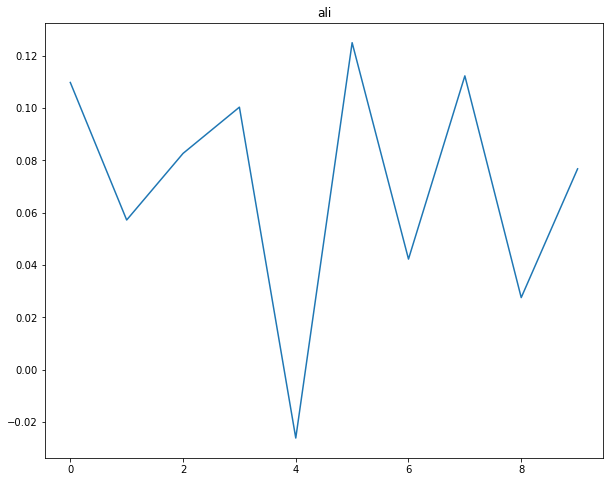

In [11]:
# Show the plot for one comedian
plt.plot(polarity_transcript[0])
plt.title(data['full_name'].index[0])
plt.show()

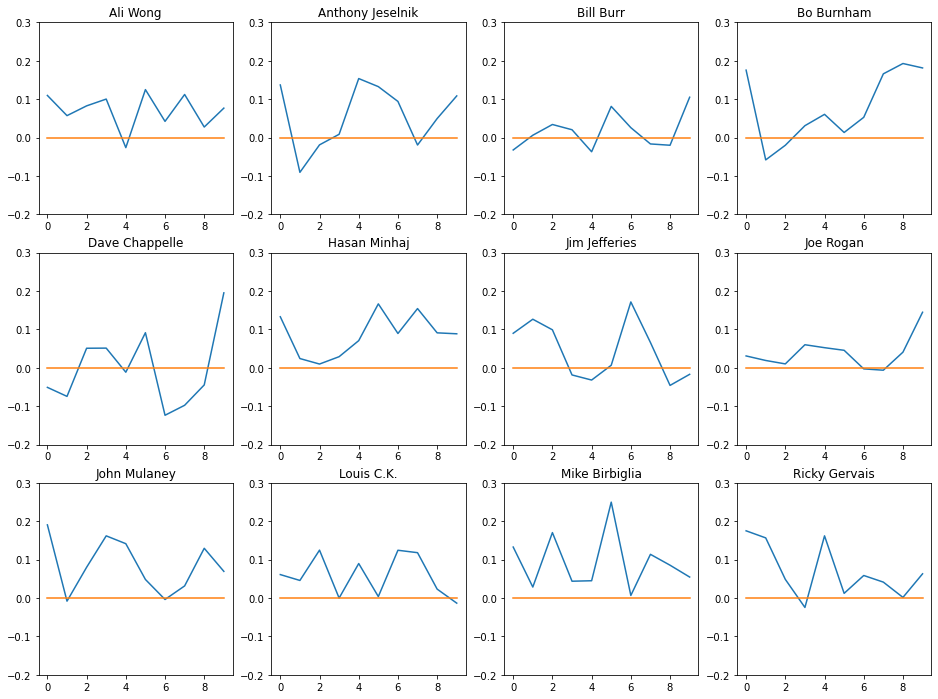

In [12]:
# Show the plot for all comedians
plt.rcParams['figure.figsize'] = [16, 12]

for index, comedian in enumerate(data.index):    
    plt.subplot(3, 4, index+1)
    plt.plot(polarity_transcript[index])
    plt.plot(np.arange(0,10), np.zeros(10))
    plt.title(data['full_name'][index])
    plt.ylim(ymin=-.2, ymax=.3)
    
plt.show()